### Bibliotecas e Obtenção dos dados

 Importando Bibliotecas

In [1]:
import pandas as pd
import pandas.io.sql as sqlio
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import psycopg2 as ps
import streamlit as st
import joblib
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV


Conexão com banco de dados PostgreSQL

In [2]:
# Construção da String de conexão
conn = ps.connect(
    host="localhost",
    port=5432,
    user="postgres",
    password="admin",
    database="SQL_lab"
)


In [3]:
sql = """
SELECT * FROM obesity.obesity_data
"""

 Obtenção da base de dados

In [4]:
df = sqlio.read_sql_query(sql, conn)
df.head()


C:\Users\dania\AppData\Local\Temp\ipykernel_2204\3587576833.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = sqlio.read_sql_query(sql, conn)


,gender,age,height,weight,family_history,favc,fcvc,ncp,caec,smoke,ch2o,scc,faf,tue,calc,mtrans,obesity
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


### Análise Exploratória dos Dados

In [5]:
print(f'Linhas do Dataframe: {df.count()}')
print(f'Colunas do Dataframe: {len(df.columns)}')

Linhas do Dataframe: gender            2111
age               2111
height            2111
weight            2111
family_history    2111
favc              2111
fcvc              2111
ncp               2111
caec              2111
smoke             2111
ch2o              2111
scc               2111
faf               2111
tue               2111
calc              2111
mtrans            2111
obesity           2111
dtype: int64
Colunas do Dataframe: 17


Colunas do Dataframe

In [6]:
df.columns

Index(['gender', 'age', 'height', 'weight', 'family_history', 'favc', 'fcvc',
       'ncp', 'caec', 'smoke', 'ch2o', 'scc', 'faf', 'tue', 'calc', 'mtrans',
       'obesity'],
      dtype='object')

Verificação de Nulos

In [7]:
df.isnull().sum()

gender            0
age               0
height            0
weight            0
family_history    0
favc              0
fcvc              0
ncp               0
caec              0
smoke             0
ch2o              0
scc               0
faf               0
tue               0
calc              0
mtrans            0
obesity           0
dtype: int64

Medidas de tendência central

In [8]:
df.describe().round(2)

,age,height,weight,fcvc,ncp,ch2o,faf,tue
count,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00
mean,24.32,1.70,86.59,2.42,2.69,2.01,1.01,0.66
std,6.36,0.09,26.19,0.53,0.78,0.61,0.85,0.61
min,14.00,1.45,39.00,1.00,1.00,1.00,0.00,0.00
25%,20.00,1.63,65.47,2.00,2.66,1.58,0.12,0.00
50%,23.00,1.70,83.00,2.39,3.00,2.00,1.00,0.63
75%,26.00,1.77,107.43,3.00,3.00,2.48,1.67,1.00
max,61.00,1.98,173.00,3.00,4.00,3.00,3.00,2.00


### Gerando gráficos para realizar a análise geral dos dados

Boxplot

C:\Users\dania\AppData\Local\Temp\ipykernel_2204\3399119113.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


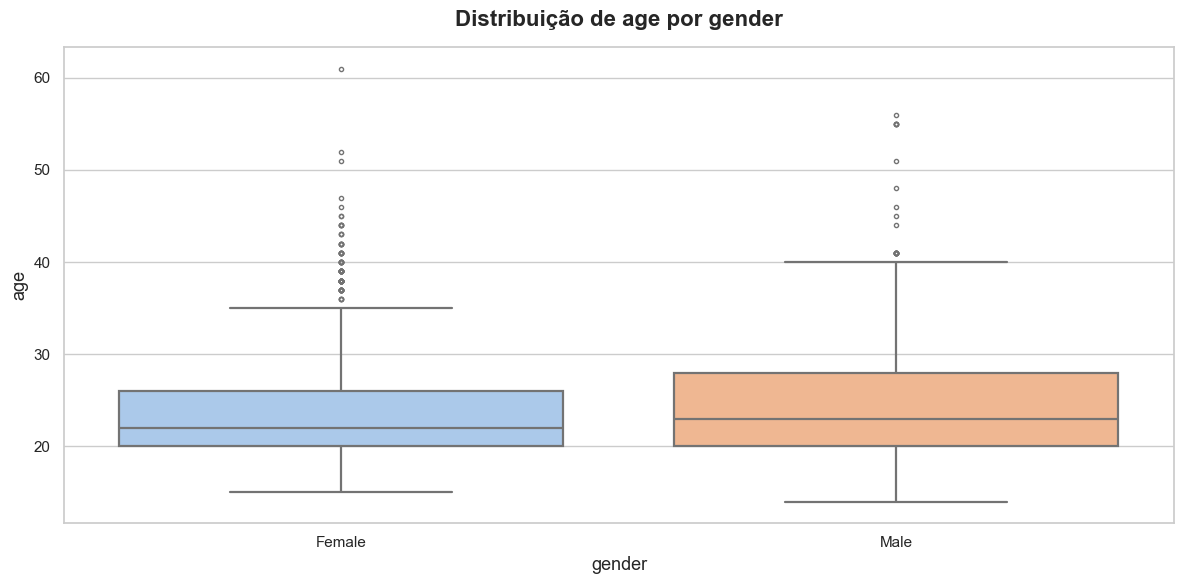

In [9]:
#Gerando um boxplot para verificar a presença de outliers

def plotar_boxplot(df, x, y):
    # Estilo do gráfico
    sns.set_theme(style="whitegrid")

    plt.figure(figsize=(12, 6))

    # Paleta leve e agradável
    sns.boxplot(
        data=df,
        x=x,
        y=y,
        palette="pastel",
        linewidth=1.6,
        fliersize=3
    )

    # Título estético
    plt.title(
        f"Distribuição de {y} por {x}",
        fontsize=16,
        weight='bold',
        pad=15
    )

    # Rotulação refinada
    plt.xlabel(x, fontsize=13)
    plt.ylabel(y, fontsize=13)

    # Melhor espaçamento
    plt.tight_layout()

    plt.show()

plotar_boxplot(df, 'gender', 'age')

Gráfico de Barras

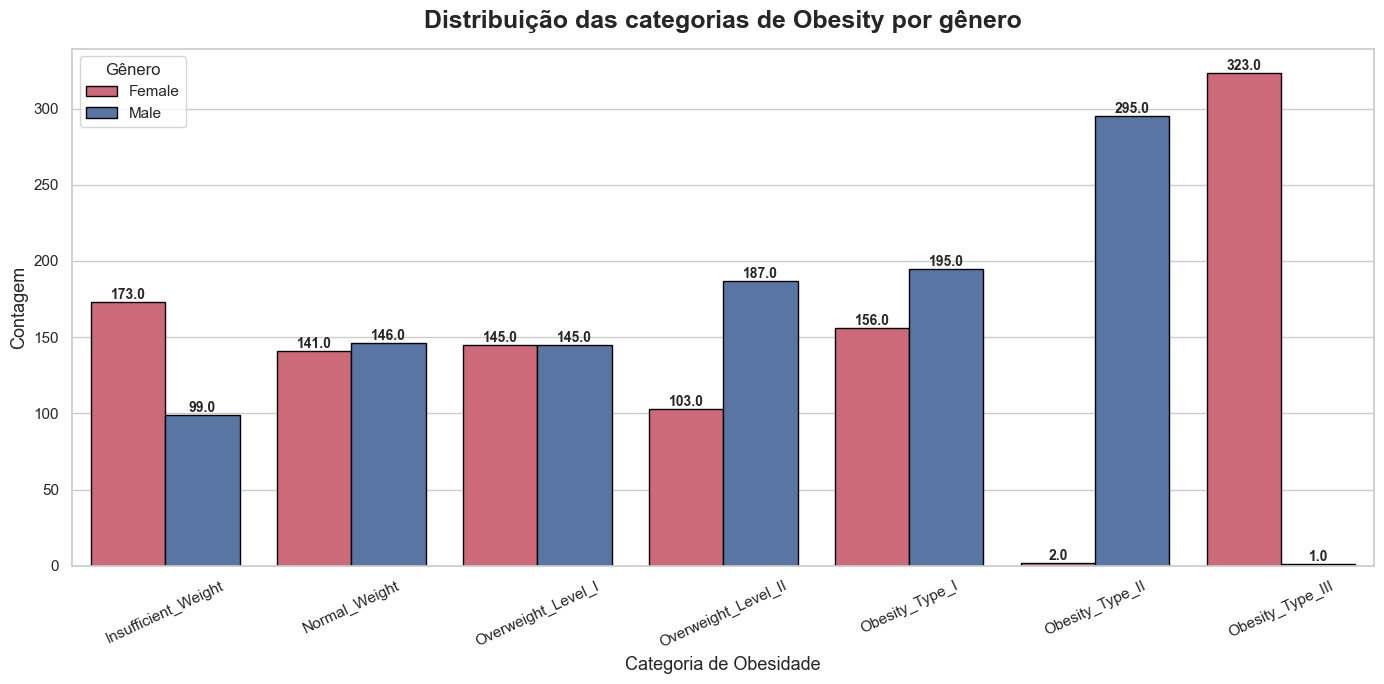

In [10]:
def plotar_obesidade_por_genero(df, genero_col='gender', obesidade_col='obesity'):

    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(14, 7))

    # Ordenação lógica das categorias de obesidade
    ordem_obesidade = [
        'Insufficient_Weight',
        'Normal_Weight',
        'Overweight_Level_I',
        'Overweight_Level_II',
        'Obesity_Type_I',
        'Obesity_Type_II',
        'Obesity_Type_III'
    ]

    df[obesidade_col] = df[obesidade_col].astype('category')
    df[obesidade_col] = df[obesidade_col].cat.set_categories(ordem_obesidade, ordered=True)

    # Paleta de cores fixa por gênero
    palette_genero = {
        "Male": "#4C72B0",
        "Female": "#DD5A6F"
    }

    ax = sns.countplot(
        data=df,
        x=obesidade_col,
        hue=genero_col,
        palette=palette_genero,
        edgecolor="black",
    )

    # Título e labels
    plt.title(
        "Distribuição das categorias de Obesity por gênero",
        fontsize=18,
        weight='bold',
        pad=15
    )
    plt.xlabel("Categoria de Obesidade", fontsize=13)
    plt.ylabel("Contagem", fontsize=13)
    plt.xticks(rotation=25, fontsize=11)

    # Rótulos nas barras (somente valores > 0)
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(
                f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center',
                va='bottom',
                fontsize=10,
                weight='bold'
            )

    plt.legend(title="Gênero", fontsize=11, title_fontsize=12)
    plt.tight_layout()
    plt.show()


plotar_obesidade_por_genero(df)

### Preparando a base para treinamento do modelo

Tratando as colunas

In [11]:
df['favc'].unique()

array(['no', 'yes'], dtype=object)

In [12]:
# gender: Male = 1 e Female = 2
# family_history: Yes = 1 e No = 0
# favc: Yes = 1, No = 0
# caec: No = 0; Sometimes = 1; Frequently = 2; Always = 3
# smoke: Yes = 1, No = 0
# scc: Yes = 1, No = 0
# calc: No = 0; Sometimes = 1; Frequently = 2; Always = 3
# mtrans: Walking = 1; Bike = 2; Public_Transportation = 3; Motorbike = 4; Automobile = 5
# Obesity : from 0 - 6 (Insufficient_Weight = 0; Normal_weight = 1 ...)


df['gender'] = df['gender'].replace(['Male', 'Female'], [1,2])
df['family_history'] = df['family_history'].replace(['yes', 'no'], [1, 0])
df['favc'] = df['favc'].replace(['yes', 'no'], [1, 0])
df['caec'] = df['caec'].replace(['no', 'Sometimes', 'Frequently', 'Always'], [0, 1, 2, 3])
df['smoke'] = df['smoke'].replace(['yes', 'no'], [1, 0])
df['scc'] = df['scc'].replace(['yes', 'no'], [1, 0])
df['calc'] = df['calc'].replace(['no', 'Sometimes', 'Frequently', 'Always'], [0, 1, 2, 3])
df['mtrans'] = df['mtrans'].replace(['Walking', 'Bike', 'Public_Transportation', 'Motorbike', 'Automobile'], [1, 2, 3, 4, 5])
df['obesity'] = df['obesity'].replace(['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'],
                                      [0, 1, 2, 3, 4, 5, 6])

C:\Users\dania\AppData\Local\Temp\ipykernel_2204\3759677135.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace(['Male', 'Female'], [1,2])
C:\Users\dania\AppData\Local\Temp\ipykernel_2204\3759677135.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['family_history'] = df['family_history'].replace(['yes', 'no'], [1, 0])
C:\Users\dania\AppData\Local\Temp\ipykernel_2204\3759677135.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. T

Colunas Tratadas

In [13]:
df.head()

,gender,age,height,weight,family_history,favc,fcvc,ncp,caec,smoke,ch2o,scc,faf,tue,calc,mtrans,obesity
0,2,21,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,3,1
1,2,21,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,3,1
2,1,23,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,3,1
3,1,27,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,1,2
4,1,22,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,3,3


Matriz de correlação

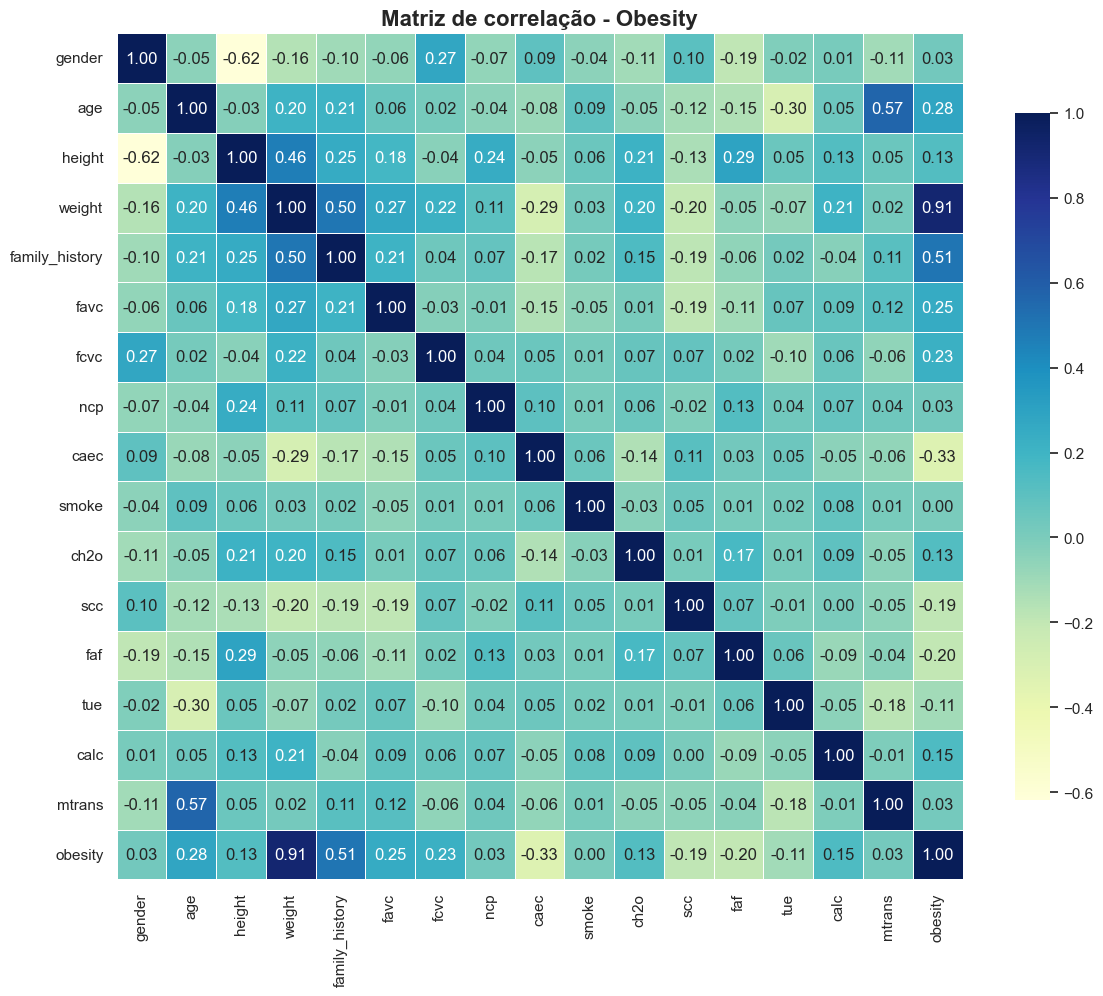

obesity           1.000000
weight            0.913251
family_history    0.505148
age               0.284082
favc              0.247793
fcvc              0.227759
calc              0.151752
height            0.133565
ch2o              0.133008
gender            0.031464
ncp               0.026690
mtrans            0.025997
smoke             0.003442
tue              -0.107991
scc              -0.194508
faf              -0.199901
caec             -0.329350
Name: obesity, dtype: float64

In [14]:
def correlacao_obesidade(df, target='obesity'):

    # Matriz de correlação (Spearman é ideal para variáveis ordinais)
    corr = df.corr()

    # Heatmap
    plt.figure(figsize=(12, 10))

    sns.heatmap(
        corr,
        annot=True,
        cmap="YlGnBu",
        fmt=".2f",
        square=True,
        linewidths=.5,
        cbar_kws={"shrink": .8}
    )

    plt.title("Matriz de correlação - Obesity", fontsize=16, weight="bold")
    plt.tight_layout()
    plt.show()

    # Retorna somente a correlação com a coluna alvo
    return corr[target].sort_values(ascending=False)

correlacao_obesidade(df)

Definindo as features do modelo

In [15]:
# Excluindo weight e height para evitar data leakage

X = df.drop(columns=['obesity', 'height', 'weight'])
y = df['obesity']

Verificando

In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2111 non-null   int64  
 1   age             2111 non-null   int64  
 2   family_history  2111 non-null   int64  
 3   favc            2111 non-null   int64  
 4   fcvc            2111 non-null   float64
 5   ncp             2111 non-null   float64
 6   caec            2111 non-null   int64  
 7   smoke           2111 non-null   int64  
 8   ch2o            2111 non-null   float64
 9   scc             2111 non-null   int64  
 10  faf             2111 non-null   float64
 11  tue             2111 non-null   float64
 12  calc            2111 non-null   int64  
 13  mtrans          2111 non-null   int64  
dtypes: float64(5), int64(9)
memory usage: 231.0 KB


In [17]:
X.head()

,gender,age,family_history,favc,fcvc,ncp,caec,smoke,ch2o,scc,faf,tue,calc,mtrans
0,2,21,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,3
1,2,21,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,3
2,1,23,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,3
3,1,27,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,1
4,1,22,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,3


Separando as colunas categóricas e numéricas

In [18]:
cat_features = [
    'gender',
    'family_history',
    'favc',
    'caec',
    'smoke',
    'scc',
    'calc',
    'mtrans'
]

num_features = [
    'age',
    'fcvc',
    'ncp',
    'ch2o',
    'faf',
    'tue'
]

Pré-processamento dos dados para o modelo DecisionTree

In [19]:
preprocessor = ColumnTransformer(
    transformers = [
        ('num', 'passthrough', num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ]
)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state = 30,
    stratify=y
)

In [21]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(
    max_depth=8,
    min_samples_split=10,
    min_samples_leaf=3,
    random_state=30
    ))
])

Encontrando os melhores parâmetros utilizando GridSearchCV

In [22]:
param_grid = {
    'classifier__max_depth': [5, 6, 8, 10, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 3, 5]
}

grid = GridSearchCV(
    model,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Melhores parâmetros:", grid.best_params_)

Melhores parâmetros: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}


### Treinamento do Modelo

In [23]:
model_best_params = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=30
    ))
])

In [24]:
model_best_params.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['age', 'fcvc', 'ncp', 'ch2o',
                                                   'faf', 'tue']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'family_history',
                                                   'favc', 'caec', 'smoke',
                                                   'scc', 'calc',
                                                   'mtrans'])])),
                ('classifier', DecisionTreeClassifier(random_state=30))])

Assertividade do modelo

In [25]:
y_pred = model_best_params.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.87      0.78        54
           1       0.63      0.55      0.59        58
           2       0.73      0.66      0.69        58
           3       0.64      0.62      0.63        58
           4       0.78      0.80      0.79        70
           5       0.88      0.87      0.87        60
           6       0.96      0.98      0.97        65

    accuracy                           0.77       423
   macro avg       0.76      0.76      0.76       423
weighted avg       0.77      0.77      0.77       423



 Salvando o modelo para aplicação no streamlit

In [26]:
joblib.dump(model_best_params, 'model_obesity.pkl')

['model_obesity.pkl']